In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df=pd.read_csv("/content/Water_data_new.csv", encoding= 'unicode_escape')

In [ ]:
df=df.rename(columns={df.columns[4]: "CONDUCTIVITY"})

In [ ]:
df['Temp']=pd.to_numeric(df['Temp'],errors='coerce')
df['D.O. (mg/l)']=pd.to_numeric(df['D.O. (mg/l)'],errors='coerce')
df['PH']=pd.to_numeric(df['PH'],errors='coerce')
df['B.O.D. (mg/l)']=pd.to_numeric(df['B.O.D. (mg/l)'],errors='coerce')
df['CONDUCTIVITY']=pd.to_numeric(df['CONDUCTIVITY'],errors='coerce')
df['NITRATENAN N+ NITRITENANN (mg/l)']=pd.to_numeric(df['NITRATENAN N+ NITRITENANN (mg/l)'],errors='coerce')
df['TOTAL COLIFORM (MPN/100ml)Mean']=pd.to_numeric(df['TOTAL COLIFORM (MPN/100ml)Mean'],errors='coerce')

In [ ]:
df

,STATION CODE,Temp,D.O. (mg/l),PH,CONDUCTIVITY,B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
0,1393,30.6,6.7,7.5,203.0,NaN,0.100,11,27.0,2014
1,1399,29.8,5.7,7.2,189.0,2.0,0.200,4953,8391.0,2014
2,1475,29.5,6.3,6.9,179.0,1.7,0.100,3243,5330.0,2014
3,3181,29.7,5.8,6.9,64.0,3.8,0.500,5382,8443.0,2014
4,3182,29.5,5.8,7.3,83.0,1.9,0.400,3428,5500.0,2014
...,...,...,...,...,...,...,...,...,...,...
1986,1330,NaN,7.9,738.0,7.2,2.7,0.518,0.518,202.0,2003
1987,1450,29.0,7.5,585.0,6.3,2.6,0.155,0.155,315.0,2003
1988,1403,28.0,7.6,98.0,6.2,1.2,NaN,NAN,570.0,2003
1989,1404,28.0,7.7,91.0,6.5,1.3,NaN,NAN,562.0,2003


In [ ]:
start=2
end=1779
station=df.iloc [start:end ,0]
# location=df.iloc [start:end ,1]
#state=df.iloc [start:end ,2]
do= df.iloc [start:end ,2].astype(np.float64)
value=0
ph = df.iloc[ start:end,3]  
co = df.iloc [start:end ,4].astype(np.float64)   
  
year=df.iloc[start:end,9]
tc=df.iloc [2:end ,8].astype(np.float64)


bod = df.iloc [start:end ,5].astype(np.float64)
na= df.iloc [start:end ,6].astype(np.float64)
na.dtype

dtype('float64')

In [ ]:
df=pd.concat([station,do,ph,co,bod,na,tc,year],axis=1)
df.columns = ['station','do','ph','co','bod','na','tc','year']

In [ ]:
df.isnull().sum()

station      0
do          27
ph           5
co          17
bod         36
na         171
tc         119
year         0
dtype: int64

In [ ]:
df['npH']=df.ph.apply(lambda x: (100 if (8.5>=x>=7)  
                                 else(80 if  (8.6>=x>=8.5) or (6.9>=x>=6.8) 
                                      else(60 if (8.8>=x>=8.6) or (6.8>=x>=6.7) 
                                          else(40 if (9>=x>=8.8) or (6.7>=x>=6.5)
                                              else 0)))))

In [ ]:
df['ndo']=df.do.apply(lambda x:(100 if (x>=6)  
                                 else(80 if  (6>=x>=5.1) 
                                      else(60 if (5>=x>=4.1)
                                          else(40 if (4>=x>=3) 
                                              else 0)))))

In [ ]:
df['nco']=df.tc.apply(lambda x:(100 if (5>=x>=0)  
                                 else(80 if  (50>=x>=5) 
                                      else(60 if (500>=x>=50)
                                          else(40 if (10000>=x>=500) 
                                              else 0)))))

In [ ]:
df['nbdo']=df.bod.apply(lambda x:(100 if (3>=x>=0)  
                                 else(80 if  (6>=x>=3) 
                                      else(60 if (80>=x>=6)
                                          else(40 if (125>=x>=80) 
                                              else 0)))))

In [ ]:
df['nec']=df.co.apply(lambda x:(100 if (75>=x>=0)  
                                 else(80 if  (150>=x>=75) 
                                      else(60 if (225>=x>=150)
                                          else(40 if (300>=x>=225) 
                                              else 0)))))

In [ ]:
df['nna']=df.na.apply(lambda x:(100 if (20>=x>=0)  
                                 else(80 if  (50>=x>=20) 
                                      else(60 if (100>=x>=50)
                                          else(40 if (200>=x>=100) 
                                              else 0)))))

In [ ]:
df['wph']=df.npH * 0.165
df['wdo']=df.ndo * 0.281
df['wbdo']=df.nbdo * 0.234
df['wec']=df.nec* 0.009
df['wna']=df.nna * 0.028
df['wco']=df.nco * 0.281
df['year']=df['year']+6
df['wqi']=df.wph+df.wdo+df.wbdo+df.wec+df.wna+df.wco 

In [ ]:
df1 = df[['year','wph', 'wdo', 'wbdo','wec','wna','wco','wqi']].copy()

In [ ]:
ag=df.groupby('year')['wqi'].mean()

In [ ]:
df=ag.reset_index(level=0,inplace=False)

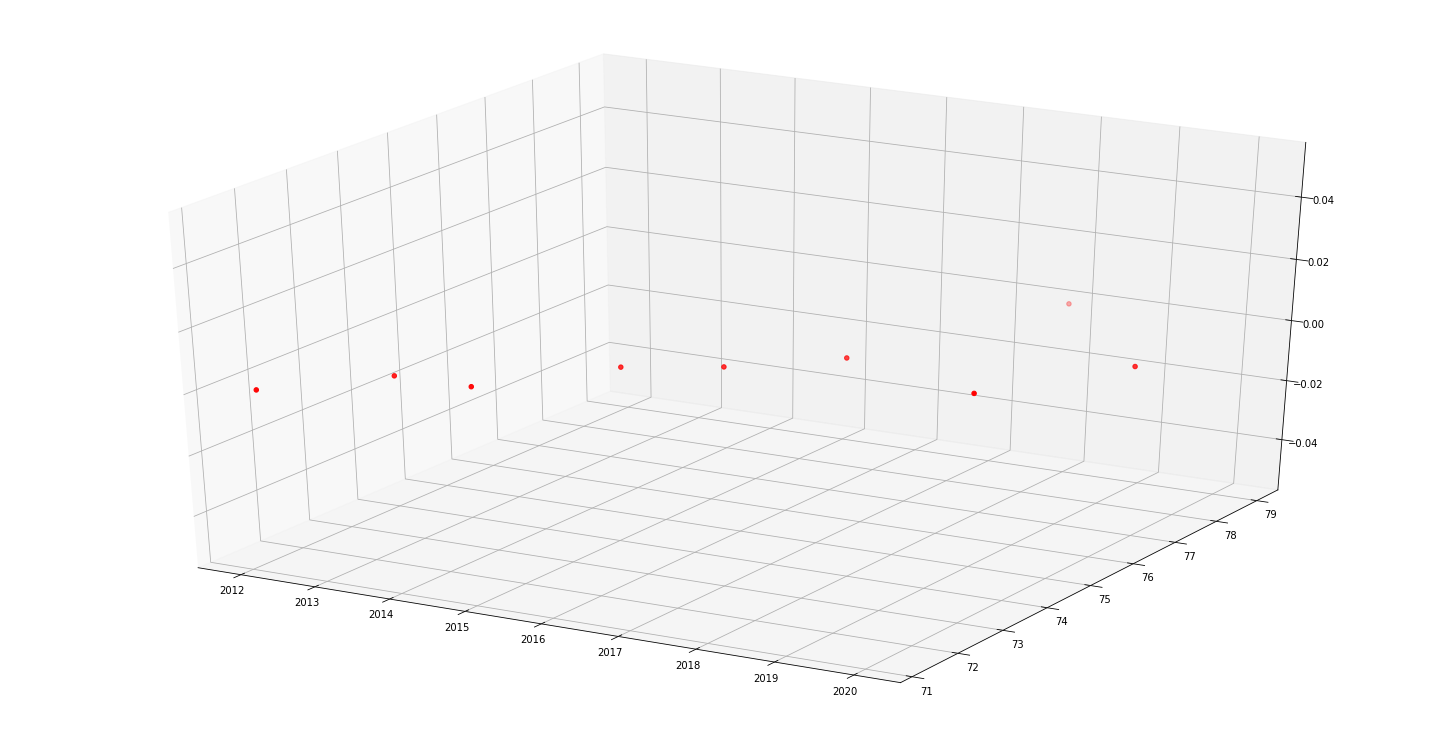

In [ ]:
year=df['year'].values
AQI=df['wqi'].values
df['wqi']=pd.to_numeric(df['wqi'],errors='coerce')
df['year']=pd.to_numeric(df['year'],errors='coerce')

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(year,AQI, color='red')
plt.show()

In [ ]:
df = df[np.isfinite(df['wqi'])]

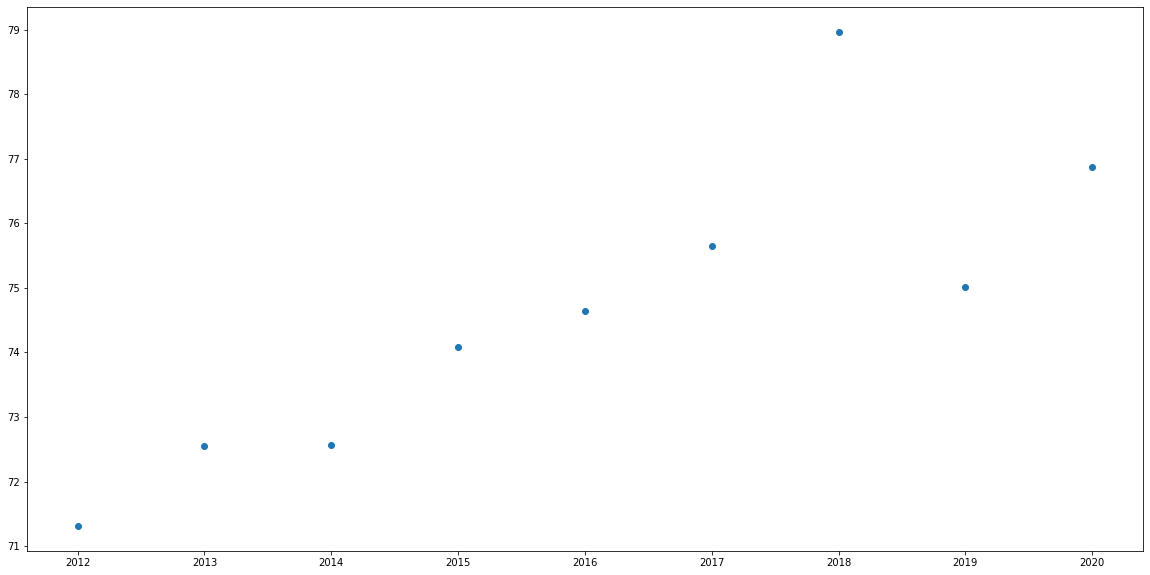

In [ ]:
cols =['year']
y = df['wqi']
x=df[cols]

plt.scatter(x,y)
plt.show()

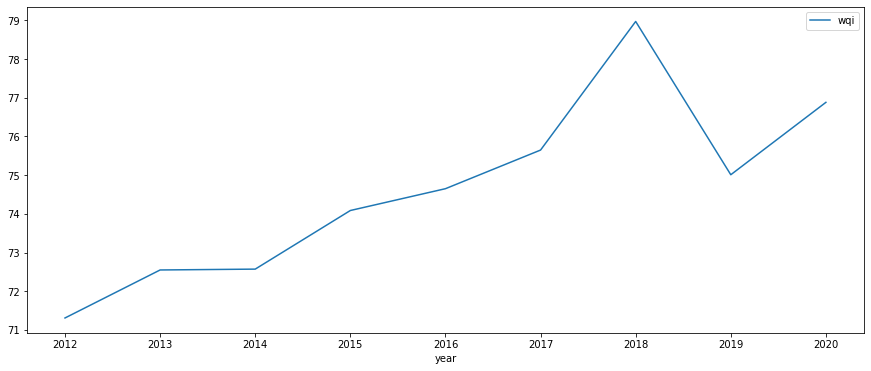

In [ ]:
import matplotlib.pyplot as plt
df=df.set_index('year')
df.plot(figsize=(15,6))
plt.show()

In [ ]:
from sklearn import neighbors,datasets
df=df.reset_index(level=0,inplace=False)

In [ ]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [ ]:
cols =['year']

In [ ]:
y = df['wqi']
x=df[cols]

In [ ]:
reg=linear_model.LinearRegression()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)

In [ ]:
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
a=reg.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error
print('mse:%.2f'%mean_squared_error(y_test,a))

mse:0.03


In [ ]:
dt = pd.DataFrame({'Actual': y_test, 'Predicted': a}) 

In [ ]:
x = (x - x.mean()) / x.std()
x = np.c_[np.ones(x.shape[0]), x]


In [ ]:
alpha = 0.1 #Step size
iterations = 3000 #No. of iterations
m = y.size #No. of data points
np.random.seed(4) #Setting the seed
theta = np.random.rand(2) #Picking some random values to start with

def gradient_descent(x, y, theta, iterations, alpha):
    past_costs = []
    past_thetas = [theta]
    for i in range(iterations):
        prediction = np.dot(x, theta)
        error = prediction - y
        cost = 1/(2*m) * np.dot(error.T, error)
        past_costs.append(cost)
        theta = theta - (alpha * (1/m) * np.dot(x.T, error))
        past_thetas.append(theta)
        
    return past_thetas, past_costs

past_thetas, past_costs = gradient_descent(x, y, theta, iterations, alpha)
theta = past_thetas[-1]

#Print the results...
print("Gradient Descent: {:.2f}, {:.2f}".format(theta[0], theta[1]))

Gradient Descent: 74.63, 2.01


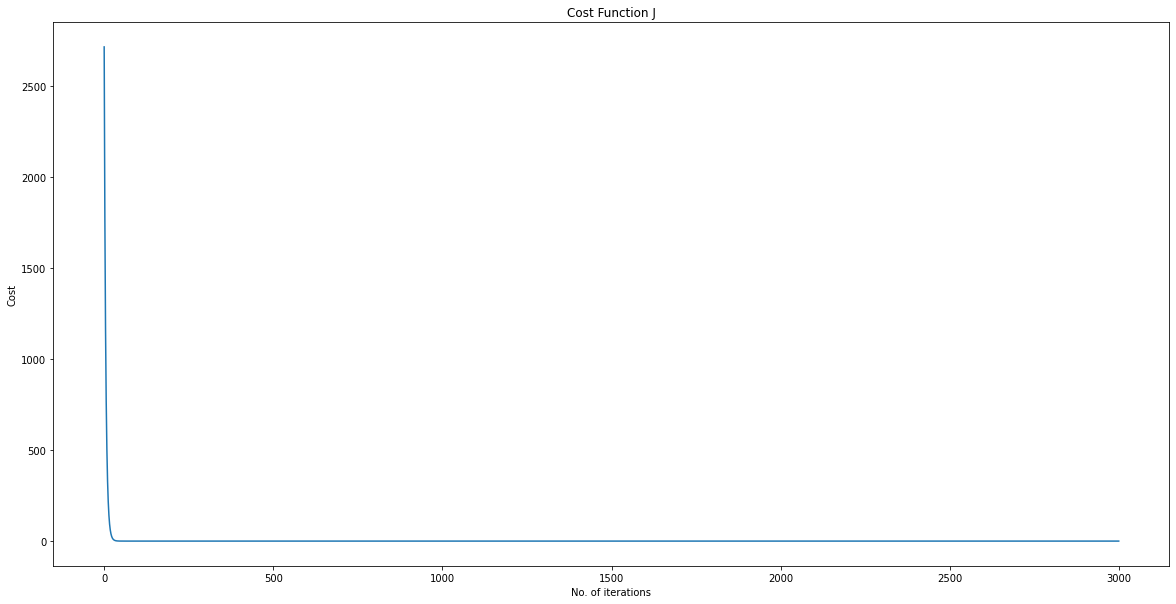

In [ ]:
plt.title('Cost Function J')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(past_costs)
plt.show()

In [ ]:
import numpy as np
newB=[74.76, 2.13]

def rmse(y,y_pred):
    rmse= np.sqrt(sum(y-y_pred))
    return rmse
   

y_pred=x.dot(newB)

dt = pd.DataFrame({'Actual': y, 'Predicted': y_pred})  
dt=pd.concat([df, dt], axis=1)

In [ ]:
from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(y,y_pred)))

1.1987755149740886


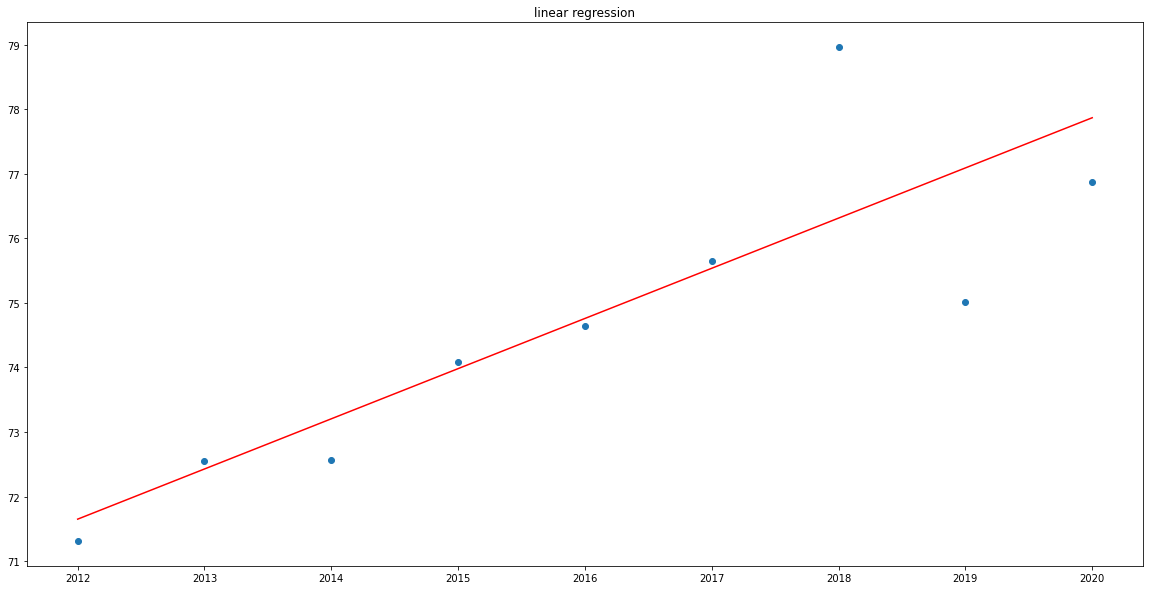

In [ ]:
x_axis=dt.year
y_axis=dt.Actual
y1_axis=dt.Predicted
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,y1_axis,color='r')
plt.title("linear regression")

plt.show()

In [ ]:
dfg= df1.groupby("year").mean()

In [ ]:
dfg=dfg.reset_index(level=0,inplace=False)
dfg

,year,wph,wdo,wbdo,wec,wna,wco,wqi
0,2012,13.458824,23.967647,19.500000,0.264706,2.657255,11.460392,71.308824
1,2013,13.750000,24.634333,20.514000,0.405000,2.286667,10.959000,72.549000
2,2014,12.535849,24.105912,20.868679,0.457358,2.479497,12.123648,72.570943
3,2015,13.163536,24.622431,20.866077,0.305304,2.490608,12.637238,74.085193
4,2016,13.129787,25.439468,20.362979,0.423191,2.588511,12.704787,74.648723
5,2017,14.542857,24.791255,20.198961,0.417662,2.266667,13.429610,75.647013
6,2018,15.222945,25.482466,21.300411,0.486986,2.368493,14.107740,78.969041
7,2019,14.186207,24.288736,20.638621,0.466897,2.767816,12.661149,75.009425
8,2020,14.653086,24.468971,20.838519,0.464444,2.786173,13.668395,76.879588


In [ ]:
dfg

,year,wph,wdo,wbdo,wec,wna,wco,wqi
0,2012,13.458824,23.967647,19.500000,0.264706,2.657255,11.460392,71.308824
1,2013,13.750000,24.634333,20.514000,0.405000,2.286667,10.959000,72.549000
2,2014,12.535849,24.105912,20.868679,0.457358,2.479497,12.123648,72.570943
3,2015,13.163536,24.622431,20.866077,0.305304,2.490608,12.637238,74.085193
4,2016,13.129787,25.439468,20.362979,0.423191,2.588511,12.704787,74.648723
5,2017,14.542857,24.791255,20.198961,0.417662,2.266667,13.429610,75.647013
6,2018,15.222945,25.482466,21.300411,0.486986,2.368493,14.107740,78.969041
7,2019,14.186207,24.288736,20.638621,0.466897,2.767816,12.661149,75.009425
8,2020,14.653086,24.468971,20.838519,0.464444,2.786173,13.668395,76.879588


In [ ]:
X=dfg.iloc[: , 1:-1]
Y=dfg.iloc[ : ,-1 ]

In [ ]:
Y

0    71.308824
1    72.549000
2    72.570943
3    74.085193
4    74.648723
5    75.647013
6    78.969041
7    75.009425
8    76.879588
Name: wqi, dtype: float64

In [ ]:
import xgboost as xg
from sklearn.metrics import mean_squared_error as MSE

x_train1, x_test1, y_train1, y_test1 = train_test_split(X, Y, 
                      test_size = 0.2, random_state = 50)
  

train_dmatrix = xg.DMatrix(data = x_train1, label = y_train1)
test_dmatrix = xg.DMatrix(data = x_test1, label = y_test1)
  

param = {"booster":"gblinear", "objective":"reg:linear"}
  
xgb_r = xg.train(params = param, dtrain = train_dmatrix, num_boost_round = 10)
pred1 = xgb_r.predict(test_dmatrix)
  
# RMSE Computation
rmse1 = np.sqrt(MSE(y_test1, pred1))
print("RMSE : % f" %(rmse1))

[00:26:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE :  0.504078


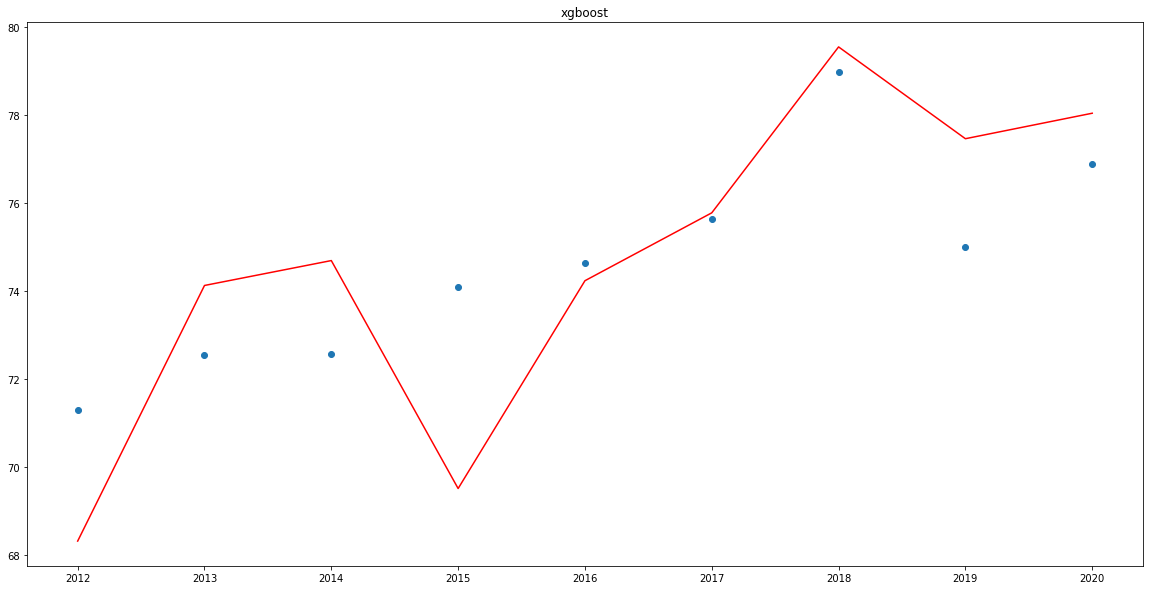

<Figure size 1440x720 with 0 Axes>

In [ ]:
df_dmatrix=xg.DMatrix(data=X)
y_pred1= xgb_r.predict(df_dmatrix)
df1=df1.groupby(["year"]).mean()
df1=df1.reset_index(level=0,inplace=False)
df4 = pd.DataFrame({'Actual': y, 'Predicted':y_pred1 })
df4['year']=df1[['year']]
df4=df4.groupby(["year"]).mean()
df4=df4.reset_index(level=0,inplace=False)

x_axis=df4.year
y_axis=df4.Actual
y1_axis=df4.Predicted
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,y1_axis,color='r')
plt.title("xgboost")
plt.figure(figsize=(20,10))
plt.show()

In [ ]:
dt=dt.drop(columns=['wqi'])

In [ ]:
y_actual=dt['Actual'].to_numpy()

In [ ]:
import pmdarima as pm

In [ ]:
pmarima = pm.auto_arima(y_actual, error_action='ignore', trace=True,
                      suppress_warnings=True, maxiter=10,
                      seasonal=False, m=12)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=78.169, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=105.175, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=71.049, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=63.139, Time=0.04 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=96.499, Time=0.04 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=10066598.586, Time=0.08 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=10100669.321, Time=0.06 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=inf, Time=0.03 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=10042033.617, Time=0.10 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=47.237, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=49.111, Time=0.04 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=45.016, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=43.507, T

In [ ]:
yhat = pmarima.predict( n_periods= 5,typ='levels')

In [ ]:
df1

,year,wph,wdo,wbdo,wec,wna,wco,wqi
0,2012,13.458824,23.967647,19.500000,0.264706,2.657255,11.460392,71.308824
1,2013,13.750000,24.634333,20.514000,0.405000,2.286667,10.959000,72.549000
2,2014,12.535849,24.105912,20.868679,0.457358,2.479497,12.123648,72.570943
3,2015,13.163536,24.622431,20.866077,0.305304,2.490608,12.637238,74.085193
4,2016,13.129787,25.439468,20.362979,0.423191,2.588511,12.704787,74.648723
5,2017,14.542857,24.791255,20.198961,0.417662,2.266667,13.429610,75.647013
6,2018,15.222945,25.482466,21.300411,0.486986,2.368493,14.107740,78.969041
7,2019,14.186207,24.288736,20.638621,0.466897,2.767816,12.661149,75.009425
8,2020,14.653086,24.468971,20.838519,0.464444,2.786173,13.668395,76.879588


###### Examples of forecast

PH Forecast

In [ ]:
wph_np = df1['wph'].to_numpy()

In [ ]:
pmarima = pm.auto_arima(wph_np, error_action='ignore', trace=True,
                      suppress_warnings=True, maxiter=10,
                      seasonal=False, m=12)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=41.312, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=74.880, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=39.367, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=67.653, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=65.278, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=25.694, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=25.896, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=27.718, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=27.687, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=26.291, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=29.843, Time=0.06 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.366 seconds


In [ ]:
forecast1 = pmarima.predict( n_periods= 5,typ='levels')

DO Forecast

In [ ]:
wdo_np = df1['wdo'].to_numpy()